# Paulina Jaszczuk - praca domowa 1

## Wczytanie pakietów

In [50]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder, OneHotEncoder, BinaryEncoder, CountEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error as rmse
import warnings
warnings.filterwarnings('ignore')

# Wczytanie danych

In [2]:
data = pd.read_csv('allegro-api-transactions.csv')
data.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


# Kodowanie zmiennych kategorycznych

### Target encoding zmiennej it_location

In [3]:
encoder = TargetEncoder()
it_location_target_encoded = encoder.fit_transform(data['it_location'], data['price'])

In [4]:
it_location_target_encoded

,it_location
0,85.423398
1,85.423398
2,61.990914
3,35.433365
4,117.191956
...,...
420015,24.306929
420016,66.785334
420017,18.682800
420018,106.203076


In [5]:
len(data.it_location) == len(it_location_target_encoded.it_location)

True

### Targer encoding vs One-hot encoding

W przypadku zastosowania do tego problemu one-hot encoding dostalibyśmy w ramce dodatkowe kolumny. Byłoby ich tyle, ile unikalnych wartości zmiennej it_location czyli jakieś 10000. Nie jest to zdecydowanie optymalne rozwiązanie.

### Kodowanie zmiennej main_category

In [6]:
data.main_category.unique()

array(['Komputery', 'Odzież, Obuwie, Dodatki', 'Dom i Ogród',
       'Książki i Komiksy', 'Biżuteria i Zegarki', 'RTV i AGD',
       'Motoryzacja', 'Dla Dzieci', 'Uroda', 'Telefony i Akcesoria',
       'Sport i Turystyka', 'Delikatesy', 'Kolekcje', 'Gry', 'Rękodzieło',
       'Zdrowie', 'Przemysł', 'Filmy', 'Fotografia', 'Biuro i Reklama',
       'Instrumenty', 'Muzyka', 'Konsole i automaty',
       'Sprzęt estradowy, studyjny i DJ-ski', 'Antyki i Sztuka', 'Bilety',
       'Nieruchomości'], dtype=object)

In [7]:
len(data.main_category.unique())

27

### One-hot encoding

In [8]:
one_hot_encoder = OneHotEncoder(cols=['main_category'], use_cat_names=True).fit_transform(data.main_category)
one_hot_encoder

,main_category_Komputery,"main_category_Odzież, Obuwie, Dodatki",main_category_Dom i Ogród,main_category_Książki i Komiksy,main_category_Biżuteria i Zegarki,main_category_RTV i AGD,main_category_Motoryzacja,main_category_Dla Dzieci,main_category_Uroda,main_category_Telefony i Akcesoria,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
420017,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Count encoding

In [9]:
count_encoder = CountEncoder(cols=['main_category']).fit_transform(data.main_category)
count_encoder

,main_category
0,14491
1,54257
2,91042
3,11572
4,54257
...,...
420015,20341
420016,28096
420017,54257
420018,42107


### Binary encoding

In [10]:
binary_encoder = BinaryEncoder(cols=['main_category']).fit_transform(data.main_category)
binary_encoder

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
420015,0,0,0,1,1,0
420016,0,0,1,0,0,1
420017,0,0,0,0,1,0
420018,0,0,1,0,0,0


## Wyniki

One-hot encoder zakodował zmienną w dodatkowych 27 kolumnach (jedynka w kolumnie z odpowiednią kategorią). Nie jest to optymalna metoda w tym przypadku. Count encoder użył liczby wystąpień danej zmiennej w kolumnie. Binary Encoder jest podobny do one-hot encoder, ale przechowuje kategorie jako binarne ciągi bitowe.

# Uzupełnianie braków

In [11]:
data = pd.read_csv('allegro-api-transactions.csv')
data = data[['price','it_seller_rating','it_quantity']]
data = data.sample(n=50000).reset_index(drop=True)
data

,price,it_seller_rating,it_quantity
0,41.00,12444,26
1,8.90,14541,474
2,6.50,10464,917
3,1.45,154061,606
4,88.99,2968,5
...,...,...,...
49995,4.99,19442,16
49996,21.90,58628,23
49997,4.83,288017,8
49998,66.00,41717,925


In [21]:
missing_data = data.copy(deep=True)
rows_numbers = np.random.randint(50000,size=5000)
missing_data.loc[rows_numbers,'it_seller_rating'] = np.nan

In [22]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             50000 non-null  float64
 1   it_seller_rating  45262 non-null  float64
 2   it_quantity       50000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


### Imputacja brakujących zmiennych za pomocą k nearest neighbours imputer
dla k = 5

In [31]:
imputed_data = KNNImputer(n_neighbors=5, weights="uniform").fit_transform(missing_data)
imputed_data = pd.DataFrame(imputed_data, columns = data.columns)

In [32]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             50000 non-null  float64
 1   it_seller_rating  50000 non-null  float64
 2   it_quantity       50000 non-null  float64
dtypes: float64(3)
memory usage: 1.1 MB


In [33]:
rmse(data.it_seller_rating, imputed_data.it_seller_rating, squared=False)

11392.017832600579

## Wyniki

RMSE wyszedł ogromny. Metoda okazała się nieskuteczna

## Eksperyment iterecyjny 1

In [41]:
errors = []
for i in range(10):
    missing_data = data.copy(deep=True)
    rows_numbers = np.random.randint(50000,size=5000)
    missing_data.loc[rows_numbers,'it_seller_rating'] = np.nan
    imputed_data = KNNImputer(n_neighbors=5, weights="uniform").fit_transform(missing_data)
    imputed_data = pd.DataFrame(imputed_data, columns = data.columns)
    errors.append(rmse(data.it_seller_rating, imputed_data.it_seller_rating, squared=False))
errors

[12148.132609007065,
 11402.234938518712,
 11596.475255539228,
 11543.72187632779,
 11915.83442298007,
 12082.10111743705,
 12021.22203297585,
 11252.622672420897,
 12012.730164955175,
 11740.925062325678]

In [42]:
np.mean(errors)

11771.600015248752

### Odchylenie standardowe wyniku:

In [43]:
np.std(errors)

294.74604602986386

##  Eksperyment iteracyjny 2

In [44]:
errors2 = []
for i in range(10):
    missing_data = data.copy(deep=True)
    rows_numbers = np.random.randint(50000,size=5000)
    rows_numbers2 = np.random.randint(50000,size=5000)
    missing_data.loc[rows_numbers,'it_seller_rating'] = np.nan
    missing_data.loc[rows_numbers,'it_quality'] = np.nan
    imputed_data = KNNImputer(n_neighbors=5, weights="uniform").fit_transform(missing_data)
    imputed_data = pd.DataFrame(imputed_data, columns = data.columns)
    errors2.append(rmse(data.it_seller_rating, imputed_data.it_seller_rating, squared=False))
errors2

[12036.620377486232,
 11416.938893614559,
 11760.146452181996,
 12524.519802485522,
 11549.54190400388,
 12217.413667278324,
 11667.672851006648,
 11526.218795562125,
 11682.822982667263,
 11567.933323592524]

In [45]:
np.mean(errors2)

11794.982904987908

### Odchylenie standardowe wyniku:

In [46]:
np.std(errors2)

335.5601282550439

## Podsumowanie

Błędy w obu przypadkach są bardzo duże. Automatyczna imputacja metodą k najbliższych sąsiadów być może jest szybka (choć dla dużuch ramek też nie do końca), ale daje mocno rozbieżne wyniki.

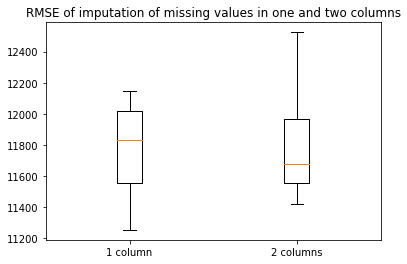

In [69]:
rmse = [errors, errors2]
fig, ax = plt.subplots()
ax.boxplot(rmse)
ax.set_xticklabels(["1 column", "2 columns"])
plt.title("RMSE of imputation of missing values in one and two columns")
plt.show()